# Data-driven 친구 추천

### 1). Key Connector 찾기
### 2). FOAF('다리 건너 친구') 추천

# 1). Key Connecter (Rough Idea)  A.K.A 집단 내 핵인싸 찾기

###      1). 한 사람을 '사전'으로 표시한 후 리스트에 모은다.

In [6]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Jen" }
]

users

[{'id': 0, 'name': 'Hero'},
 {'id': 1, 'name': 'Dunn'},
 {'id': 2, 'name': 'Sue'},
 {'id': 3, 'name': 'Chi'},
 {'id': 4, 'name': 'Thor'},
 {'id': 5, 'name': 'Clive'},
 {'id': 6, 'name': 'Hicks'},
 {'id': 7, 'name': 'Devin'},
 {'id': 8, 'name': 'Kate'},
 {'id': 9, 'name': 'Klein'},
 {'id': 10, 'name': 'Jen'}]

###      2). 기존의 친구 관계를 '튜플'로 표시한 후 리스트에 모은다.

In [3]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

friendships

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (5, 7),
 (6, 8),
 (7, 8),
 (8, 9)]

###      3). 사람마다 관계의 수를 카운트하는 카운터 '사전'에 모은다.

In [8]:
# 한 사람을 표현하는 사전에 '친구들' 이라는 리스트 항목을 각 인물 사전 하나하나에 추가해준다.
for user in users:
    user["friends"] = []

users

[{'id': 0, 'name': 'Hero', 'friends': []},
 {'id': 1, 'name': 'Dunn', 'friends': []},
 {'id': 2, 'name': 'Sue', 'friends': []},
 {'id': 3, 'name': 'Chi', 'friends': []},
 {'id': 4, 'name': 'Thor', 'friends': []},
 {'id': 5, 'name': 'Clive', 'friends': []},
 {'id': 6, 'name': 'Hicks', 'friends': []},
 {'id': 7, 'name': 'Devin', 'friends': []},
 {'id': 8, 'name': 'Kate', 'friends': []},
 {'id': 9, 'name': 'Klein', 'friends': []},
 {'id': 10, 'name': 'Jen', 'friends': []}]

In [10]:
# 위의 관계 튜플에는 관계가 나와있으니, 
# 관계정보 튜플 하나하나 돌며, 만약 관계가 있을 경우, '친구들' 이라는 리스트에 그 친구를 대표하는 '사전'을 추가한다. 
#(사전 자체를 넣는 이유 => 친구 다린 건너 친구등 필요한 정보를 이용하려고)

for i, j in friendships:
    # this works because users[i] is the user whose id is i
    users[i]["friends"].append(users[j]) # add i as a friend of j
    users[j]["friends"].append(users[i]) # add j as a friend of i

#users

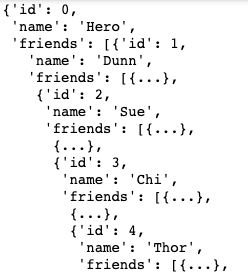

In [ ]:
# 
def number_of_friends(user):
    """how many friends does _user_ have?"""
    return len(user["friends"]) # length of friend_ids list

total_connections = sum(number_of_friends(user)
                        for user in users) # 24

num_users = len(users)
avg_connections = total_connections / num_users # 2.4